# Time Series Analysis of Open Power Systems Data

We will utilize the time series tools on the Pandas library to organize, transform, analyze and visualize our data in this analysis. We will focus our attention on the wrangling and visualization aspects.

## The Data

Our data for this analysis is [Germany's Open Power Systems Data (OPSD)](https://github.com/jenfly/opsd/raw/master/opsd_germany_daily.csv), which has daily observations. We know that Germany has been growing their renewable energy production for the past few years, and this data set contains the country's total electicity consumption, wind and solar power production form 2006 to 2017.

The energy production and consumption records are in units of gigawatt-hours (GWh). The data dictionary is as follows:

+ Date: date in yyyy-mm-dd format
+ Consumption: energy consumption in GWh
+ Wind: wind energy production in GWh
+ Solar: solar energy production in GWh
+ Wind+Solar: Sum of the wind and solar energy production in GWh

We will use this data to investigate how electricity consumption and production in Germany has varied over time. We are attempting to answer the following questions:

+ When is energy consumption typically highest?
+ What, if any, are the seasonality affects throughout a year for energy production and consumption?
+ What are the long-term trends in energy consumption as well as in wind and solar energy production?
+ How does the prodcution of wind and solar energy compare to the country's energy consumption, and what has the production-to-consumption ratio changed over the years?

In [1]:
# Import libraries/packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Display figures inline in Jupyter notebook
%matplotlib inline

# Use seaborn's style defaults, set default figure size
sns.set(rc={'figure.figsize':(11,5)})

In [2]:
# Read in the data as a dataframe
opsd_daily = pd.read_csv('data/opsd_germany_daily.csv')

# Checl the shape of the dataframe
opsd_daily.shape

(4383, 5)

In [3]:
# Inspect head of dataframe
opsd_daily.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


In [4]:
# Inspect tail of dataframe
opsd_daily.tail(3)

,Date,Consumption,Wind,Solar,Wind+Solar
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


The data starts January 1, 2006 and ends December 31, 2017 and is spread over 4383 observations.

In [5]:
# Inspect data types
opsd_daily.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

We would like to use the Date field as the index for this time series, we it is preferable to have it in DatetimeIndex type. It is object type currently (Pandas is treating it as text).

In [6]:
# Convert date field to datetime type
opsd_daily['Date'] = pd.to_datetime(opsd_daily['Date'])

# Inspect data types to validate it was converted
opsd_daily.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

In [7]:
# Set Date field as the index
opsd_daily = opsd_daily.set_index('Date')

# Inspect the dataframe head
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [8]:
# Inspect the datetime index
opsd_daily.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

The previous lines may be more efficiently done in a single line whil reading in the data, as shown in the cell below.

In [9]:
# Read in the data as a time series, with date as the index and in Datetime type
#opsd_daily = pd.read_csv('data/opsd_germany_daily.csv', index_col=0, parse_dates=True)

The with the dates in theis Datetime format, Pandas allows for the day, month, and year to be accessed as attributes. This enables us to be flexible in the wrangling, anlaysis, and modifying of our dataframe.

In [10]:
# Add year, month, and days to the dataframe
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.weekday_name

# Inspect a random sample of 5 observations
opsd_daily.sample(5)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-11-20,1547.113,11.570,21.425,32.995,2014,11,Thursday
2007-08-25,1138.670,NaN,NaN,NaN,2007,8,Saturday
2010-05-11,1381.515,65.781,NaN,NaN,2010,5,Tuesday
2013-05-24,1297.862,31.673,111.633,143.306,2013,5,Friday
2015-08-23,1063.363,289.786,171.318,461.104,2015,8,Sunday


Another useful feature Pandas allows us with this format is the ability to access data with .loc, so that we may grab single records, or slices, and even partial matches.

In [11]:
# Inspect the record for August 23, 2008
opsd_daily.loc['2008-08-23']

Consumption      1152.01
Wind                 NaN
Solar                NaN
Wind+Solar           NaN
Year                2008
Month                  8
Weekday Name    Saturday
Name: 2008-08-23 00:00:00, dtype: object

In [12]:
# Inspect the days of October 24 and 25, 2017
opsd_daily.loc['2017-10-24' : '2017-10-25']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2017-10-24,1508.51484,290.400,41.479,331.879,2017,10,Tuesday
2017-10-25,1506.14869,454.959,52.361,507.320,2017,10,Wednesday


In [13]:
# Inspect the month of June, 2014
opsd_daily.loc['2014-06']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-06-01,1068.982,23.571,155.656,179.227,2014,6,Sunday
2014-06-02,1403.083,15.254,169.436,184.690,2014,6,Monday
2014-06-03,1433.509,14.213,166.671,180.884,2014,6,Tuesday
2014-06-04,1444.044,67.454,153.844,221.298,2014,6,Wednesday
2014-06-05,1436.595,176.676,158.335,335.011,2014,6,Thursday
2014-06-06,1403.466,61.768,212.446,274.214,2014,6,Friday
2014-06-07,1176.898,38.270,203.093,241.363,2014,6,Saturday
2014-06-08,1029.637,49.895,192.656,242.551,2014,6,Sunday
2014-06-09,1075.393,76.425,195.666,272.091,2014,6,Monday


## Visualizing The Time Series

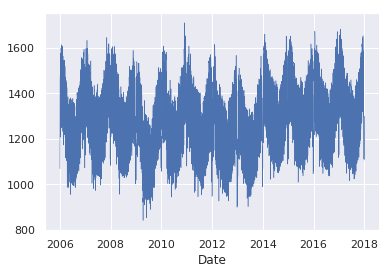

In [14]:
# Line plot of full time series
# Semi-colon suppresses fig info form being displayed
opsd_daily['Consumption'].plot(linewidth=0.5);

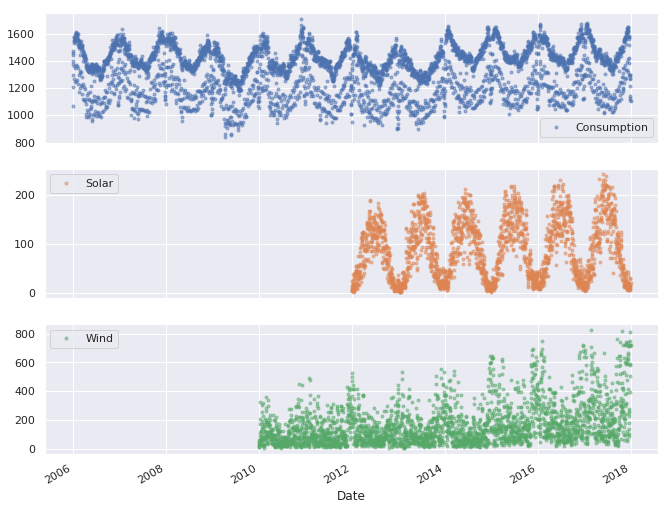

In [15]:
# Scatter plot with Consumption, wind, and solar
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = opsd_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None',
                                 figsize=(11,9), subplots=True)
for ax in axes:
    ax.set_label('Daily Totals (GWh)')

From this figure we can begin to see a few things emerge from the data:

+ Energy consumption appears highest in winter and lowest in summer.
+ Consumption appears to have two groups: one oscillating about 1400 GWh, the other about 1100 GWh. Could these groups be weekdays and weekends?
+ Solar production appears highest in summer.
+ Wind production appears to have a rising trend.

Another note on what this figure is that there is periodicity (called 'seasonality'), as indicated by the regular repeating pattern in regular time windows. The oscillations between high and low values in all three time series are on an anual time scale, which may correspond to seasonal changes in the weather.

Finally, this figure also indicates there may be more seasonal effects, perhaps throughout the week. As indicated above, this may correspond to weekdays and weekends. We can explore this further by examining a single year.

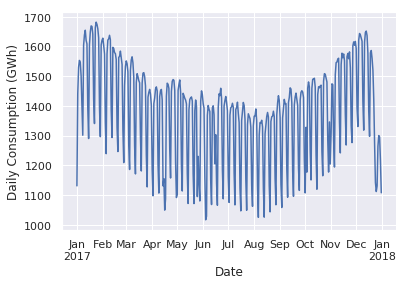

In [16]:
# Investigate consumption in 2017
ax = opsd_daily.loc['2017', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

There are clearly oscillations at the weekly level.

Another interesting feature has presented itself: electricity consumption is markedly lower in January and late December, possibly around the Christmas holiday. Looks drill down to January and February.

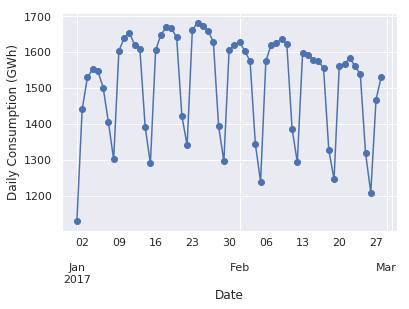

In [17]:
# Inspect January and February 2017 consumption
ax = opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o',
                                                            linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');

It is clear now that energy consumption is highest during the weekdays and lowest on the weekends. For better interpretability we may like to inculde vertical gridlines on a weekly time scale instead of just at the first of the month.

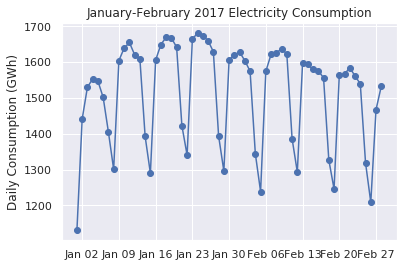

In [18]:
# Build in matplotlib directly to avoid issues with DataFrame's .plot()
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc['2017-01':'2017-02', 'Consumption'], marker='o',
       linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('January-February 2017 Electricity Consumption')

# Set x-axis major ticks to weekly intervals, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))

# Format x-tixk labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

## Exploring Seasonality

To investigate the seasonality of the data we will break it into different chunks of time and look at their distrubtions.

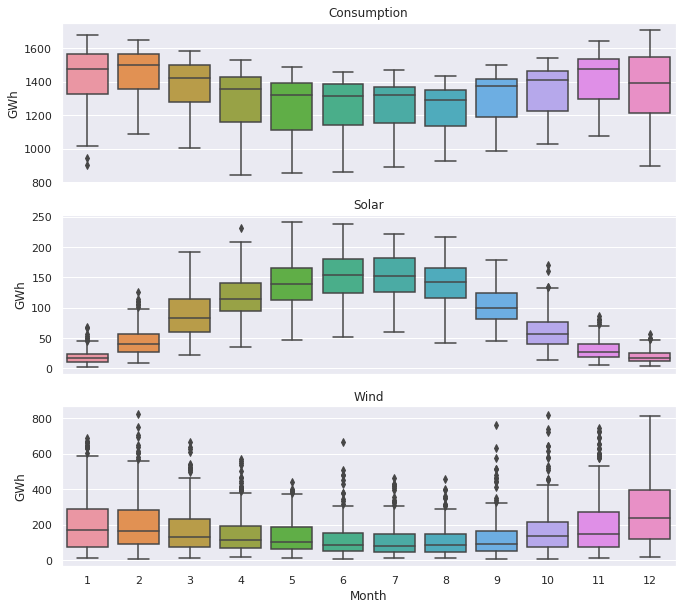

In [19]:
# Group by month, inspect yearly seasonality
fig, axes = plt.subplots(3, 1, figsize=(11,10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=opsd_daily, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    
    # Remove the automatic x-axis label from all but bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

The yearly seasonality is clear in this view as well, but we now have some more insight:

+ As we saw in the 2017 drill-down, consumption is higher in the winter and lower in the summer, and the median and lower quartiles are lower in January and December than in February and November. This figure indicates that this is consistent throughout the years in the data set.
+ Wind and Solar production both show yearly seasonality, with Wind containing noticeably more outliers. This reflects the effects of occasional extreme winds, most likely associated with storms and other transient weather conditions around the wind generator sites.

We will continue drilling down into weekly seasonality.

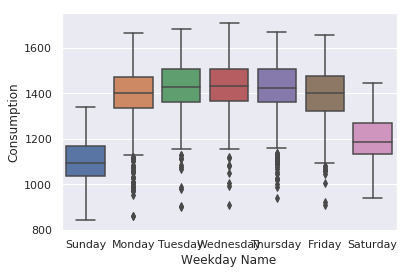

In [20]:
# Drill down into weekly grouping
sns.boxplot(data=opsd_daily, x='Weekday Name', y='Consumption');

As indicated in a previous figure, the consumption numbers are much higher during the weekdays compared to the weekends, with low outliers on weekdays possibly during holidays falling on weekdays.

Looking at the exact cause of the seasonal behaviour is beyond this analysis, but having a subject matter expert to provide context could account for some of the trends shown in these figures. Also asking further questions and searching for their answers may yield more insight. We may also choose to perform an autocorrelation plot to plot the correlation coefficients of the time series with itself at different time lags. This is a randomness check for the data, which if the autocorrealtion value is near zero, then the data is random.

Also, with highly seasonal data, we can decompaose the signal into seasonality trend as well as long-term trend, which would be useful for forecasting. This can be done with classical seasonal decomposition, or with the Facebook Prophet model.

## Frequencies

Since this data is uniformly spaced in time, we can associate the time series with a frequency.

In [21]:
# Sequence of uniformly spaced dates from 2010-04-03 through 2010-04-27, 5 day frequency
pd.date_range('2010-04-03', '2010-04-27', freq='5D')

DatetimeIndex(['2010-04-03', '2010-04-08', '2010-04-13', '2010-04-18',
               '2010-04-23'],
              dtype='datetime64[ns]', freq='5D')

In [22]:
# Sequence of unifromly spaced dates now with hourly frequency
pd.date_range('2010-04-27', periods=8, freq='H')

DatetimeIndex(['2010-04-27 00:00:00', '2010-04-27 01:00:00',
               '2010-04-27 02:00:00', '2010-04-27 03:00:00',
               '2010-04-27 04:00:00', '2010-04-27 05:00:00',
               '2010-04-27 06:00:00', '2010-04-27 07:00:00'],
              dtype='datetime64[ns]', freq='H')

We can look again at our DatetimeIndex to see that it has no frequency (freq=None), since the index was created from the date sequence in the data flat file, with no frequency explicitely specified during creation.

In [23]:
# Inspect index again
opsd_daily.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

We can manually assign frequency as needed with Pandas, where any missing dates or times in the data will have new rows added for them and either empty filled (NaN) or filled by a specified fillinig method (forward filling, or interpolation). We can see this by creating a new dataframe from the Consumption data.

In [24]:
# Select a date range for the new dataframe
times_sample = pd.to_datetime(['2013-02-03', '2013-02-06', '2013-02-08'])

# Create new dataframe with only the Consumption from specified dat range
consum_sample = opsd_daily.loc[times_sample, ['Consumption']].copy()

# Inspect the new dataframe
consum_sample

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


In [25]:
# Convert data to daily frquency, not filling missing data
consum_freq = consum_sample.asfreq('D')

# Create column with missing data, forward fill method
consum_freq['Consumption - Forward Fill'] = consum_sample.asfreq('D', method='ffill')

# Inspect dataframe
consum_freq

,Consumption,Consumption - Forward Fill
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


Performing this action will enable us to perform time series analyses that require uniformly spaced data without missing values. Note that we must choose an appropriate fill method though.

## Resampling

Pandas also enables us to resample our data as needed, downampling (resampling at lower frequency) through aggregation, and upsampling (resampling at higher frequency) through interpolation or some other data filling method. Note that upsampling is not as common as downsampling.

We will downsample our OPSD data to different times scales in order to explore how it can help an analysis. Using the Pandas .resample() method, we will create a Resampler object, which is similar to a Pandas GroupBy object, and we then apply various aggregation methods for each time bin in the data group.

In [26]:
# Declare the fields we to include in resampling
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']

# Resample to weekly frequeny, aggregate with mean
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()

# Inspect first 3 rows of this new, resampled dataframe
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


Given that the data set contained daily observations, this dataframe should contain $1/7$ the amount of observations as the roriginal dataframe.

In [27]:
print(opsd_daily.shape[0], '\n', opsd_weekly_mean.shape[0])
print(opsd_weekly_mean.shape[0] / opsd_daily.shape[0])
print(1/7)

4383 
 627
0.1430527036276523
0.14285714285714285


We can now visualize the weekly mean on top of the daily values so that we can compare them.

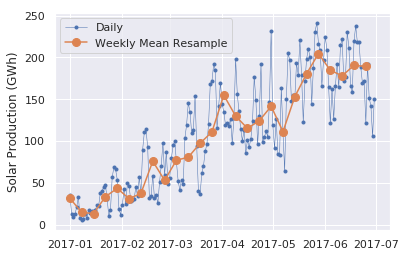

In [28]:
# Decalre the time range for comparison
start, end = '2017-01', '2017-06'

# Plot daily and weekly resampled time series
fig, ax = plt.subplots()

# Daily
ax.plot(opsd_daily.loc[start:end, 'Solar'],
       marker='.', linestyle='-', linewidth=0.5, label='Daily')

# Weekly
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'],
       marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')

# Label the y axis and show the legend
ax.set_ylabel('Solar Production (GWh)')
ax.legend();

Note that the higher variability from the daily data is smoothed out when we average it out in the downsampling aggregate. Let's consider monthly frequency with aggregating with sums (which will return a 0 value for missing data, instead of NaN, so we will change this with min_count).

In [29]:
# Calculate monthly sums, set value to NaN for months with less than 28 days of data
opsd_monthly = opsd_daily[data_columns].resample('M').sum(min_count=28)

# Inspect the first 3 rows of the dataframe
opsd_monthly.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,45304.704,NaN,NaN,NaN
2006-02-28,41078.993,NaN,NaN,NaN
2006-03-31,43978.124,NaN,NaN,NaN


Note that Pandas labels data resampled at monthly, quarterly, and annual frequencies with the right bin edge, and uses left bin edge for all other (compare with the weekly resampled data previously covered).

Let's visualize the monthly time series using the consumption as a line plot and the stacked Solar and Wind production as an are plot.

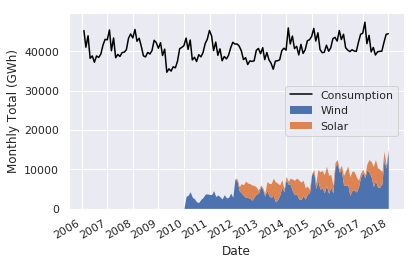

In [30]:
# Plot consumption, and wind and solar production together
fig, ax = plt.subplots()
ax.plot(opsd_monthly['Consumption'], color='black', label='Consumption')
opsd_monthly[['Wind', 'Solar']].plot.area(ax=ax, linewidth=0)

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total (GWh)');

The yearly seasonality appears in each time series at this monthly time scale. We also see that the consumption, over time, is relatively stable as wind production has steadily been growing. Wind and Solar, together, are taking an increasing share of the electricity consumed.

Let's further explore that last point by resampling to an annual frequency and calculating the ratio of Wind+Solar to Consumption for each year.

In [31]:
# Compute annual sums, set values to NaN for years with less than 360 days data
opsd_annual = opsd_daily[data_columns].resample('A').sum(min_count=360)

# Set index to year component, since default is last day of each year
opsd_annual = opsd_annual.set_index(opsd_annual.index.year)
opsd_annual.index.name = 'Year'

# Compute ratio of Wind+Solar to Consumption
opsd_annual['Wind+Solar/Consumption'] = opsd_annual['Wind+Solar'] / opsd_annual['Consumption']

# Inspect last 3 rows of dataframe
opsd_annual.tail(3)

,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption
Year,,,,,
2015,505264.56300,77468.994,34907.138,112376.132,0.222410
2016,505927.35400,77008.126,34562.824,111570.950,0.220528
2017,504736.36939,102667.365,35882.643,138550.008,0.274500


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

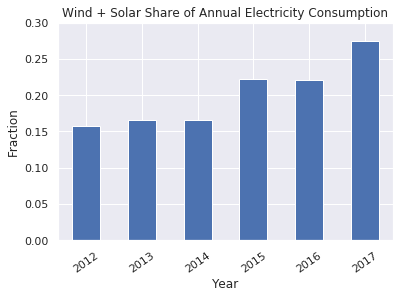

In [32]:
# Make bar plot of Wind+Solar share of annual consumption, 2012 on (no solar prior)
ax = opsd_annual.loc[2012:, 'Wind+Solar/Consumption'].plot.bar(color='C0')
ax.set_ylabel('Fraction')
ax.set_ylim(0, 0.3)
ax.set_title('Wind + Solar Share of Annual Electricity Consumption')
plt.xticks(rotation=35)

This figure makes it clear to the viewer that the combined production of Wind and Solar electrcity has been increasing its share of the energy consumed each year since 2012, from 15% to about 27%.

## Rolling Windows

Rolling window operations are transformations for time series data that splits the data into time windows, with the data in each window aggregated with a function (mean, median, sum, etc.). It is unlike downsampling in that the bins in rolling windows overlap and "roll" along at the same frequency as the input data. This means that the transformed time series is at the same frequency as the original time series.

The weighting of all data points within the windows' aggregation may be specified (Gaussian, triangular, etc.), but we will continue with the default, eqaul weighting.

Let's explore the 7-day rolling mean of our daily data, using cneter-True to label the windows at their midpoint (i.e.: 2006-01-01 to 2006-01-07 will be labelled as 200-01-04).

In [33]:
# Compute centered 7-day rolling mean
opsd_7d = opsd_daily[data_columns].rolling(7, center=True).mean()

# Inspect first 10 rows of 7-day rolling mean dataframe
opsd_7d.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


Note that the mid-point (2006-01-04) is the first non-missing rolling mean value since it is the midpoint of the first rolling window.

Now let's visualize the differences between rolling mean and resampling by updating the previous 6 month plot (January through June 2017) to include the 7-day rolling mean next on top of the weekly mean resampled time series and the original daily time series.

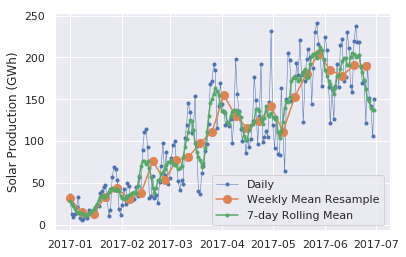

In [34]:
# Declare the start and end of the date range to extract
start, end = '2017-01', '2017-06'

# Plot daily, weekly resampled mean, and 7-day rolling mean together
fig, ax = plt.subplots()

# Daily
ax.plot(opsd_daily.loc[start:end, 'Solar'],
       marker='.', linestyle='-', linewidth=0.5, label='Daily')

# Weekly resampled mean
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'],
       marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')

# 7-day rolling mean
ax.plot(opsd_7d.loc[start:end, 'Solar'],
       marker='.', linestyle='-', label='7-day Rolling Mean')

ax.set_ylabel('Solar Production (GWh)')
ax.legend();

This figure shows the smoothing of higher frequency variability through averaging it out in the rolling mean calculations, even though it still maintains the same spacing as the weekly mean resampling. We can aslo see that the peaks and troughs in the 7-day rolling mean align closely with that of the daily time series, whereas the peaks and troughs of the weekly resampled time series are less closely aligned due to coarser granularity.

## Trends

Time series can sometimes show some slow, or gradual, variability in addition to higher frequency variability (i.e.: seasonalit and noise). We visualize these trends with rolling means at different time scales. The rolling means will smooth a time series by averaging out the variations at frequencies higher than the window size. They also average out any seasonality on a time scale equal to the window size. This will allow lower-frequency variations within the time series data to be further investiagted.

Our OPSD data has strong yearly and weekly seasonality, we will further explore the time series by investigating rolling means at those time scales. Since we already have the 7-day rolling mean, we will create the 365-day rolling mean.

In [35]:
# Create 365-day rolling mean
opsd_365d = opsd_daily[data_columns].rolling(window=365, center=True,
                                            min_periods=360).mean()

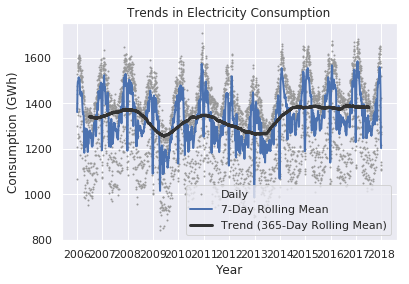

In [36]:
# Visualize 7-day and 365-day rolling means on top of daily time series
fig, ax = plt.subplots()

# Daily
ax.plot(opsd_daily['Consumption'], marker='.', markersize=2, color='0.6',
       linestyle='None', label='Daily')

# 7-day rolling mean
ax.plot(opsd_7d['Consumption'], linewidth=2, label='7-Day Rolling Mean')

# 365-day rollinig mean
ax.plot(opsd_365d['Consumption'], color='0.2', linewidth='3',
        label='Trend (365-Day Rolling Mean)')

# Set x-tixks to yearly interval, add labels and legend
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption')
ax.legend();

This figure shows us that the yearly seasonality is retained in the 7-day rolling mean, while smoothing out the daily variability, which shows us such insights as higher consumption in winter and lower consumption in summer, with dramatic decreases during winter holidays.

When we view the 365-day rolling mean, the long-term trend shows up. This long-term trend in our time series is relatively flat, with a few anomalous low periods around 2009 and between 2012 and 2013.

Let's dive in further with the trends in wind and solar production.

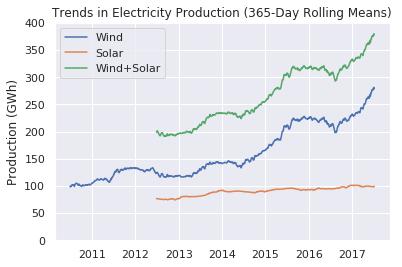

In [37]:
# Plot 365-day rolling mean of wind and solar
fig, ax = plt.subplots()
for name in ['Wind', 'Solar', 'Wind+Solar']:
    ax.plot(opsd_365d[name], label=name)
    
# Set x-ticks to yearly interval, adjust y-limits, add labels and legend
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.set_ylim(0, 400)
ax.set_ylabel('Production (GWh)')
ax.set_title('Trends in Electricity Production (365-Day Rolling Means)')
ax.legend();

This figure of long-term trends indicates that Germany's continuation to expnad in Wind and Solar electrcity production is yielding a subtle growth in solar production, while wind production increasing at a much higher rate.

## Conclusions

### When is energy consumption typically highest?

Energy consumption is typically higher during the summer season on a yearly basis, and throughout the weekdays, from a daily basis.

### What, if any, are the seasonality affects throughout a year for energy production and consumption?

There appears to be higher energy consumption during the winter months, with a large drop in consumption during late December and early January, possibly due to holidays. There is also a significant rise in Solar production during the summer season.

### What are the long-term trends in energy consumption as well as in wind and solar energy production?

The long-term trends are that energy consumption in Germany is relatively flat over the years, with small growth noticeable in solar production, and large growth in wind production.

### How does the prodcution of wind and solar energy compare to the country's energy consumption, and what has the production-to-consumption ratio changed over the years?

The combined production of Wind and Solar electrcity has been increasing its share of the energy consumed each year since 2012, from 15% to about 27%, though it still remains only a part of the country's total energy sources.